In [1]:
from sklearn.metrics import roc_curve, average_precision_score, \
    precision_recall_curve, roc_auc_score, auc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

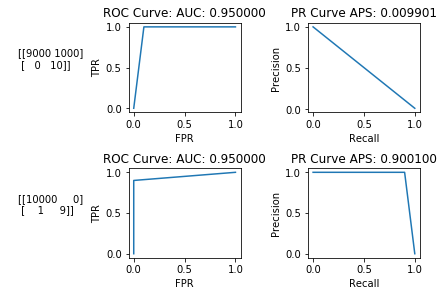

In [45]:
cm1 = np.array([
    [9000, 1000],
    [0, 10]
])
cm2 = np.array([
    [10000, 0],
    [1, 9]
])

cms = [cm1, cm2]


# print(np.zeros(np.sum(cm1[0, :])).shape)
# print(np.ones(np.sum(cm1[1, :])).shape)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(len(cms), 3
                      #, height_ratios=heights,
                      ,width_ratios=[1, 5, 5]
                     )

for i, cm in enumerate(cms):
    y_true = np.append(np.zeros(np.sum(cm[0, :])), np.ones(np.sum(cm[1, :])))
    y_pred = np.append(np.zeros(np.sum(cm[:, 0])), np.ones(np.sum(cm[:, 1])))
    
    ax = fig.add_subplot(gs[i, 0])
    ax.text(0.5, 0.5, str(cm))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax = fig.add_subplot(gs[i, 1])
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Curve: AUC: %f' % roc_auc_score(y_true, y_pred))

    ax = fig.add_subplot(gs[i, 2])
    p, r, th = precision_recall_curve(y_true, y_pred)
    ax.plot(r, p)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('PR Curve APS: %f' % average_precision_score(y_true, y_pred))
plt.show()


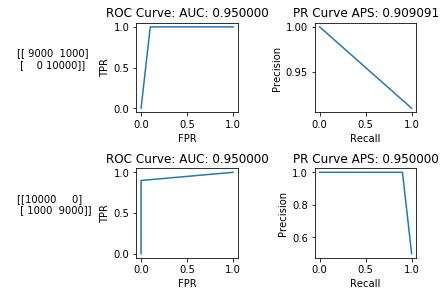

In [46]:
cm1 = np.array([
    [9000, 1000],
    [0, 10000]
])
cm2 = np.array([
    [10000, 0],
    [1000, 9000]
])

cms = [cm1, cm2]


# print(np.zeros(np.sum(cm1[0, :])).shape)
# print(np.ones(np.sum(cm1[1, :])).shape)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(len(cms), 3
                      #, height_ratios=heights,
                      ,width_ratios=[1, 5, 5]
                     )

for i, cm in enumerate(cms):
    y_true = np.append(np.zeros(np.sum(cm[0, :])), np.ones(np.sum(cm[1, :])))
    y_pred = np.append(np.zeros(np.sum(cm[:, 0])), np.ones(np.sum(cm[:, 1])))
    
    ax = fig.add_subplot(gs[i, 0])
    ax.text(0.5, 0.5, str(cm))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax = fig.add_subplot(gs[i, 1])
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Curve: AUC: %f' % roc_auc_score(y_true, y_pred))

    ax = fig.add_subplot(gs[i, 2])
    p, r, th = precision_recall_curve(y_true, y_pred)
    ax.plot(r, p)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('PR Curve APS: %f' % average_precision_score(y_true, y_pred))
plt.show()


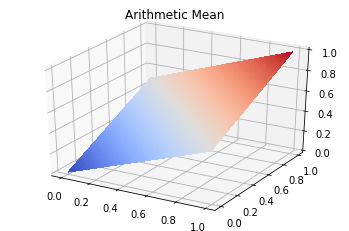

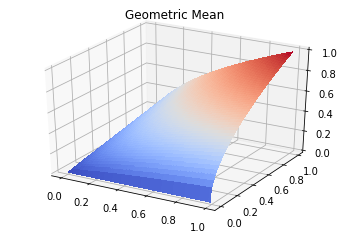

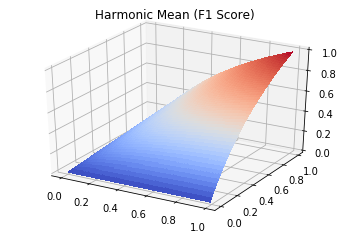

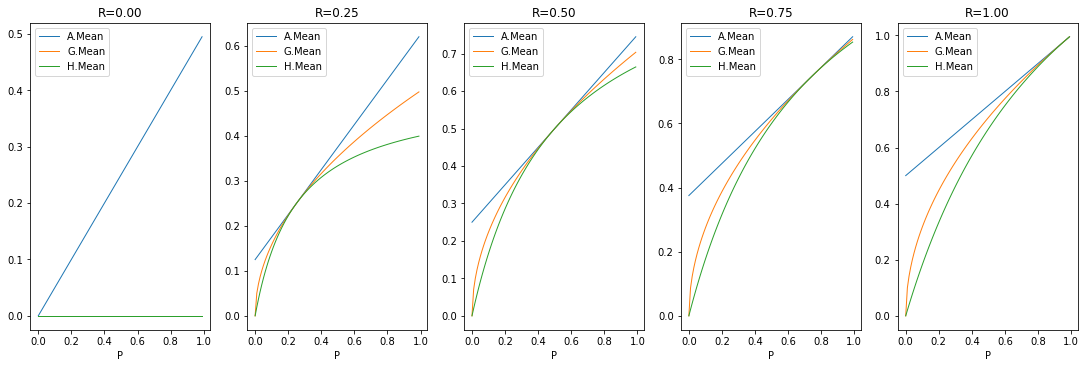

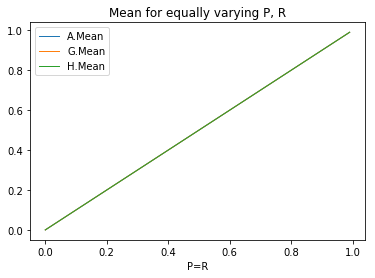

In [9]:
# HARMONIC MEAN VS MEAN


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Make data.
P = np.arange(1e-15, 1, 0.01)
R = np.arange(1e-15, 1, 0.01)
P, R = np.meshgrid(P, R)


fig = plt.figure()
ax = fig.gca(projection='3d')
Z = (P + R) / 2.0
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Arithmetic Mean')
plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
Z = np.sqrt(P*R)
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Geometric Mean')
plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
Z = 2* P*R / (P+R)
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Harmonic Mean (F1 Score)')
plt.show()


Rsteps = np.array([1e-15, 0.25, .5, 0.75, 1])
# R = np.copy(P)

fig = plt.figure(constrained_layout=True, figsize=[15, 5])
gs = fig.add_gridspec(1, len(Rsteps)
                      #, height_ratios=heights,
                      # ,width_ratios=[1, 5, 5]
                     )


for j, r in enumerate(Rsteps):
    ax = fig.add_subplot(gs[0, j])
    P = np.arange(1e-15, 1, 0.01)
    R = r*np.ones(len(P))  #np.arange(1e-15, 1, 0.01)
    labels = ['A.Mean', 'G.Mean', 'H.Mean']
    data = [
        (P+R)/2,
        np.sqrt(P*R),
        2* P*R / (P+R)
    ]
    # Plot the surface.
    ax.plot(P, data[0], linewidth=1, label=labels[0])
    ax.plot(P, data[1], linewidth=1, label=labels[1])
    ax.plot(P, data[2], linewidth=1, label=labels[2])
    ax.set_xlabel('P')
    ax.legend()
    # Customize the z axis.
    # ax.set_zlim(0, 1)
    # Add a color bar which maps values to colors.
    # fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('R=%.2f' % r)
plt.show()


fig = plt.figure()
ax = fig.gca()

P = np.arange(1e-15, 1, 0.01)
R = P # np.ones(len(P))  #np.arange(1e-15, 1, 0.01)
labels = ['A.Mean', 'G.Mean', 'H.Mean']
data = [
    (P+R)/2,
    np.sqrt(P*R),
    2* P*R / (P+R)
]
# Plot the surface.
ax.plot(P, data[0], linewidth=1, label=labels[0])
ax.plot(P, data[1], linewidth=1, label=labels[1])
ax.plot(P, data[2], linewidth=1, label=labels[2])
ax.set_xlabel('P=R')
ax.legend()
# Customize the z axis.
# ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Mean for equally varying P, R')
plt.show()



# fig = plt.figure()
# ax = fig.gca()

# P = np.arange(1e-15, 1, 0.01)
# R = 0.5 * np.ones(len(P))  #np.arange(1e-15, 1, 0.01)
# labels = ['A.Mean', 'G.Mean', 'H.Mean']
# data = [
#     (P+R)/2,
#     np.sqrt(P*R),
#     2* P*R / (P+R)
# ]
# # Plot the surface.
# ax.plot(P, data[0], linewidth=1, label=labels[0])
# ax.plot(P, data[1], linewidth=1, label=labels[1])
# ax.plot(P, data[2], linewidth=1, label=labels[2])
# ax.legend()
# # Customize the z axis.
# # ax.set_zlim(0, 1)
# # Add a color bar which maps values to colors.
# # fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Mean for equal P, R IS THE SAME. Here mean for R=1 and varying P')
# plt.show()




In [21]:
import pandas as pd
from sod.core.metrics import _confusion_matrix as cm

print('''
One doubt: for a binary case with prediction scores,
if I compute:
the Harmonic mean H of TPR and TNR
the F1score F of one class (say, the positive)
I should get that the threshold maximizing H is the same maximizing F.
This is not true: I show two confusion matrices:
''')

_ = cm([0]*160+ [1]*160, [0]*150 + [1]*10 + [0]*50 + [1]*110, compute_eval_metrics=True)
hmean = 2 * _.recall[0]*_.recall[1] / (_.recall[0] + _.recall[1])
f1score = _.f1score[1]
display(_)
print('Hmean(TPR, TNR) = %f > %f = F1score(pos_label)' % (hmean, f1score))

print()
print('Let\'s add 100 negative instances wrongly predicted (false positives) and 100 positive correctly predicted (true positives)')
_ = cm([0]*260+ [1]*260, [0]*150 + [1]*110 + [0]*50 + [1]*210, compute_eval_metrics=True)
# _ = cm([0]*160+ [1]*160, [0]*159+[1]*1+[0]*55+[1]*105, compute_eval_metrics=True)
hmean = 2 * _.recall[0]*_.recall[1] / (_.recall[0] + _.recall[1])
f1score = _.f1score[1]
display(_)
print('Hmean(TPR, TNR) = %f < %f = F1score(pos_label)' % (hmean, f1score))


One doubt: for a binary case with prediction scores,
if I compute:
the Harmonic mean H of TPR and TNR
the F1score F of one class (say, the positive)
I should get that the threshold maximizing H is the same maximizing F.
This is not true: I show two confusion matrices:



,inlier,outlier,support,recall,precision,f1score
inlier,150,10,160,0.9375,0.750000,0.833333
outlier,50,110,160,0.6875,0.916667,0.785714


Hmean(TPR, TNR) = 0.793269 > 0.785714 = F1score(pos_label)

Let's add 100 negative instances wrongly predicted (false positives) and 100 positive correctly predicted (true positives)


,inlier,outlier,support,recall,precision,f1score
inlier,150,110,260,0.576923,0.75000,0.652174
outlier,50,210,260,0.807692,0.65625,0.724138


Hmean(TPR, TNR) = 0.673077 < 0.724138 = F1score(pos_label)


In [52]:
# let's see if there are ranges of best thresholds roc auc and best threshold roc auc which differ
from IPython.display import display, HTML
import numpy as np, pandas as pd
# for printing, we can do this:
# with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
# or we simply set once here the max_col_width
pd.set_option('display.max_colwidth', 250)

from sklearn.metrics import roc_curve, average_precision_score, \
    precision_recall_curve, roc_auc_score, auc, confusion_matrix
import sod.core.metrics as mtr

def harmonicmean(x, y):
    ret = np.zeros(len(x), dtype=float)
    isfinite = x*y != 0
    ret[isfinite] = 2*x[isfinite]*y[isfinite] / (x[isfinite] + y[isfinite])
    return ret
    
ypred = np.random.rand(N + n)  # np.array([1]*505 + [0]*505) # 
for N, n in [(1000, 10), (10, 1000), (505, 505)]:
    print('\nClasses: %d of %d positives' % (N, N+n))
    ytrue = np.append(np.ones(N), np.zeros(n)).astype(int)
    # fpr, tpr, thresholds, index, best_threshold = mtr._binary_clf_curve(ytrue, ypred, method='roc')
    fpr, tpr, th = roc_curve(ytrue, ypred)
    hmean = harmonicmean(tpr, 1-fpr)
    display(pd.DataFrame({'tpr': tpr[1:], 'tnr': (1-fpr)[1:], 'hmean': hmean[1:], 'th': th[1:]}).reset_index(drop=True).sort_values(['hmean'], ascending=False).head())
    
    p, r, th = precision_recall_curve(ytrue, ypred)
    hmean = harmonicmean(p, r)
    idx = np.argmax(hmean[:-1])
    display(pd.DataFrame({'p': p[:-1], 'r': r[:-1], 'hmean': hmean[:-1], 'th': th}).reset_index(drop=True).sort_values(['hmean'], ascending=False).head())

    
#     print('AUC: TH: %f, TPR: %f, TNR: %f' % (th[idx+1], tpr[idx+1], 1-fpr[idx+1]))
#     for poslabel in [1, 0]:
#         p, r, th = precision_recall_curve(ytrue, ypred)
#         fscore = harmonicmean(p, r)
#         idx = np.argmax(fscore[:-1])
#         print('PRC (pos label:%d): TH: %f, F-score:%f, P:%f, R:%f' % (poslabel, th[idx], fscore[idx], p[idx], r[idx]))



Classes: 1000 of 1010 positives


,tpr,tnr,hmean,th
13,0.667,0.4,0.500094,0.318349
9,0.416,0.6,0.491339,0.569729
11,0.481,0.5,0.490316,0.508094
10,0.416,0.5,0.454148,0.568060
12,0.481,0.4,0.436776,0.505980


,p,r,hmean,th
0,0.990099,1.000,0.995025,0.001686
1,0.990089,0.999,0.994525,0.002603
2,0.990079,0.998,0.994024,0.002623
3,0.990070,0.997,0.993523,0.002635
4,0.990060,0.996,0.993021,0.002680



Classes: 10 of 1010 positives


,tpr,tnr,hmean,th
14,0.7,0.550,0.616000,0.531509
12,0.6,0.616,0.607895,0.603748
18,0.9,0.458,0.607069,0.445528
16,0.8,0.466,0.588942,0.453514
17,0.8,0.458,0.582512,0.445866


,p,r,hmean,th
344,0.016334,0.9,0.032086,0.445528
343,0.016304,0.9,0.032028,0.445136
342,0.016275,0.9,0.031972,0.445117
341,0.016245,0.9,0.031915,0.443598
340,0.016216,0.9,0.031858,0.442771



Classes: 505 of 1010 positives


,tpr,tnr,hmean,th
253,0.532673,0.500990,0.516346,0.474661
255,0.534653,0.499010,0.516217,0.473416
251,0.528713,0.502970,0.515520,0.476140
254,0.532673,0.499010,0.515292,0.473656
249,0.520792,0.508911,0.514783,0.481526


,p,r,hmean,th
0,0.500992,1.00000,0.667548,0.002623
2,0.500994,0.99802,0.667108,0.002680
4,0.500996,0.99604,0.666667,0.003258
1,0.500497,0.99802,0.666667,0.002635
3,0.500498,0.99604,0.666225,0.002952


Checking difference between best threshold using F1score on positive class (\textbf{F1P}), and Harmonic mean between TPR and TNR (\textbf{HROC})'

Confusion matrix (C.as="classified as"):
\begin{vmatrix}
 & C.as N & C.as P \\
N & \textbf{TN} & \textbf{FP}\\
P & \textbf{FN} & \textbf{TP}
\end{vmatrix}


\begin{equation} \label{eq1}

\begin{split}

\end{split}
\end{equation}

\begin{equation} \label{eq1}

\begin{split}

F1P  & =  \frac{2TP}{2TP + FP + FN} \\
     & \\
HROC & = 2 \frac{\frac{TP}{P} \frac{TN}{N}}{\frac{TP}{P} + \frac{TN}{N}} \\
     & = 2 \frac{\frac{TP \cdot TN}{P \cdot N}}{\frac{TP \cdot N + TN \cdot P}{P \cdot N}} \\
     %& = 2 \frac{TP \cdot TN}{TP \cdot N + TN \cdot P} \\
     %& = \frac{2 TP}{\frac{TP \cdot N}{TN} + P}
     
\end{split}
\end{equation}


$$
F1P  & =  \frac{2TP}{2TP + FP + FN} \\
     & \\
HROC & = 2 \frac{\frac{TP}{P} \frac{TN}{N}}{\frac{TP}{P} + \frac{TN}{N}} \\
     & = 2 \frac{\frac{TP \cdot TN}{P \cdot N}}{\frac{TP \cdot N + TN \cdot P}{P \cdot N}} \\
     %& = 2 \frac{TP \cdot TN}{TP \cdot N + TN \cdot P} \\
     %& = \frac{2 TP}{\frac{TP \cdot N}{TN} + P}
$$

\begin{equation} \label{eq1}

\begin{split}

F1P  & =  \frac{2TP}{2TP + FP + FN} \\
     & \\
HROC & = 2 \frac{\frac{TP}{P} \frac{TN}{N}}{\frac{TP}{P} + \frac{TN}{N}} \\
     & = 2 \frac{\frac{TP \cdot TN}{P \cdot N}}{\frac{TP \cdot N + TN \cdot P}{P \cdot N}} \\
     %& = 2 \frac{TP \cdot TN}{TP \cdot N + TN \cdot P} \\
     %& = \frac{2 TP}{\frac{TP \cdot N}{TN} + P}
     
\end{split}
\end{equation}

1141 instances


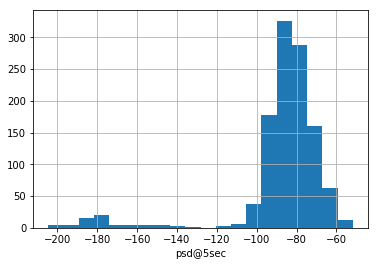

clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11.sklmodel


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=2048, n_estimators=100,
                n_jobs=None, random_state=11, verbose=0, warm_start=False)

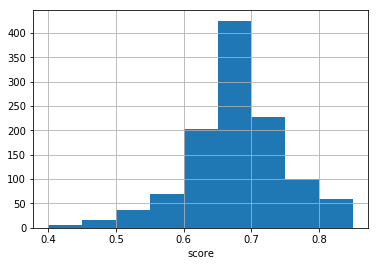

In [22]:
import yaml, os, pandas as pd, numpy as np
from sod.core.paths import DATASETS_DIR, EVALUATIONS_RESULTS_DIR
from joblib import dump, load

dfr = pd.read_hdf(os.path.join(DATASETS_DIR, 'sod_test_distances_around_2000.hdf'))

data = dfr[pd.notna(dfr['psd@5sec'])]
print('%d instances' % len(data))
feats = data['psd@5sec'].values.reshape(len(data), 1)

plt.hist(data['psd@5sec'], bins=20)
plt.xlabel('psd@5sec')
plt.grid()
plt.show()

clf = None
for _ in os.listdir(EVALUATIONS_RESULTS_DIR):
    if all(['=psd@5sec&' in _, 'random_state=11' in _, 'max_samples=2048' in _, 'n_estimators=100' in _]):
        _ = os.path.join(EVALUATIONS_RESULTS_DIR, _)
        if os.path.isfile(_):
            print(os.path.basename(_))
            clf = load(_)
            break
display(clf)

preds = -clf.score_samples(feats)

plt.hist(preds, bins=np.arange(0.4, 0.9, 0.05))
plt.xlabel('score')
plt.grid()
plt.show()

In [ ]:
 - controllare gli stessi eventi di me e questo, dove stanno le distribuzioni di score
 - prendere gli outlier di dino, vedere quali sono nel nuovo database e controllare che siano outliers
 - scaricare a distanze 0-9 (stesso yaml dell'ultimo database)
 - 